In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string 
import re
import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\otaku7\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\otaku7\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\otaku7\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [29]:
df=pd.read_csv(r"C:\Users\otaku7\Desktop\GP\depresion\sentiment_tweets3.csv")
df

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      10314 non-null  int64 
 1   message to examine         10314 non-null  object
 2   label (depression result)  10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 241.9+ KB


In [31]:
df.isnull().sum()

Index                        0
message to examine           0
label (depression result)    0
dtype: int64

In [32]:
df.drop(index=10313, inplace=True)
df

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...,...
10308,802308,Many sufferers of depression aren't sad; they ...,1
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1


In [33]:
df.rename(columns={'message to examine': 'message'}, inplace=True)

In [34]:
df.rename(columns={'label (depression result)': 'result'}, inplace=True)

In [35]:
df

,Index,message,result
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...,...
10308,802308,Many sufferers of depression aren't sad; they ...,1
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1


In [36]:
df.describe()

,Index,result
count,10313.000000,10313.000000
mean,491223.308640,0.224280
std,261682.893213,0.417128
min,106.000000,0.000000
25%,263019.000000,0.000000
50%,514969.000000,0.000000
75%,773448.000000,0.000000
max,802312.000000,1.000000


# Data Processing

In [37]:
# removing url
def remove_url(text):
    url_pattern = re.compile(r'(https?://\S+)|(www\.\S+)|(\S+\.\S+/\S+)')
    return url_pattern.sub(r'', text)

df['message'] = df['message'].apply(remove_url)

In [38]:
df

,Index,message,result
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga,0
2,220,@comeagainjen -,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!!,0
...,...,...,...
10308,802308,Many sufferers of depression aren't sad; they ...,1
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1


In [39]:
#removing emoji
def remove_emoji(text):
    emoji_pattern = re.compile("["
                                  u"\U0001F600-\U0001F64F"  # emoticons
                                  u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                  u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                  u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                  u"\U00002702-\U000027B0"  # other miscellaneous symbols
                                  u"\U000024C2-\U0001F251"  # enclosed characters
                                "]+", flags=re.UNICODE)
    
    return emoji_pattern.sub(r'', text)

df['message'] = df['message'].apply(remove_emoji)
df

,Index,message,result
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga,0
2,220,@comeagainjen -,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!!,0
...,...,...,...
10308,802308,Many sufferers of depression aren't sad; they ...,1
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1


In [40]:
#Removing Punctuations
# match all non-alphanumeric and non-whitespace characters
pattern = r"[^\w\s]"


df['message'] = df['message'].apply(lambda x: re.sub(pattern, " ", x))

df

,Index,message,result
0,106,just had a real good moment i missssssssss hi...,0
1,217,is reading manga,0
2,220,comeagainjen,0
3,288,lapcat Need to send em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE,0
...,...,...,...
10308,802308,Many sufferers of depression aren t sad they ...,1
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1


In [41]:
#Removing Stop Words
StopWords=set(stopwords.words('english'))
def remove_stopwords(text):
    result= " ".join([word for word in text.split() if word not in StopWords])
    return result

df['message']=df['message'].apply(remove_stopwords)
df

,Index,message,result
0,106,real good moment missssssssss much,0
1,217,reading manga,0
2,220,comeagainjen,0
3,288,lapcat Need send em accountant tomorrow Oddly ...,0
4,540,ADD ME ON MYSPACE,0
...,...,...,...
10308,802308,Many sufferers depression sad feel nothing per...,1
10309,802309,No Depression G Herbo mood done stressing peop...,1
10310,802310,What depression succumbs brain makes feel like...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1


In [42]:
#lemmatization
lem=nltk.stem.wordnet.WordNetLemmatizer()
def lemmatize_(text):
    result = " ".join([lem.lemmatize(word) for word in text.split()])
    return result
df['message']=df['message'].apply(lemmatize_)
df

,Index,message,result
0,106,real good moment miss much,0
1,217,reading manga,0
2,220,comeagainjen,0
3,288,lapcat Need send em accountant tomorrow Oddly ...,0
4,540,ADD ME ON MYSPACE,0
...,...,...,...
10308,802308,Many sufferer depression sad feel nothing pers...,1
10309,802309,No Depression G Herbo mood done stressing peop...,1
10310,802310,What depression succumbs brain make feel like ...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1


In [43]:
#stemming 
stemmer=PorterStemmer()
def stem_(text):
    result = " ".join([stemmer.stem(word) for word in text.split()])
    return result
df['message']=df['message'].apply(stem_)
df

,Index,message,result
0,106,real good moment miss much,0
1,217,read manga,0
2,220,comeagainjen,0
3,288,lapcat need send em account tomorrow oddli i e...,0
4,540,add me on myspac,0
...,...,...,...
10308,802308,mani suffer depress sad feel noth persist nag ...,1
10309,802309,no depress g herbo mood done stress peopl deserv,1
10310,802310,what depress succumb brain make feel like neve...,1
10311,802311,ketamin nasal spray show promis against depres...,1


In [44]:
#Tokens Cleaning
def cleanData(text):
    # Remove repeating characters from tokens
    ReapeatTokensRm =  " ".join( [ re.sub(r'(\w)\1{2,}', r'\1', word) for word in text.split()] ) 
    # Remove tokens containing digits
    digitTokensRm =  " ".join( [ word for word in ReapeatTokensRm.split() if not re.search(r'\d', word) ] ) 
    # Remove tokens containing underscore
    underscoreTokensRm =  " ".join( [ word for word in digitTokensRm.split() if not re.search(r'_|\w*_\w*', word) ] )
    # Remove tokens containing Special Characters
    specialTokensRm =  " ".join( [ word for word in underscoreTokensRm.split() if not re.search(r'[^a-zA-Z0-9\s]', word) ] ) 
    # Remove tokens less than 2 characters
    return " ".join( [ word for word in specialTokensRm.split() if len(word) > 2 ] )  \


df['message'] = df['message'].apply(cleanData)

df

,Index,message,result
0,106,real good moment miss much,0
1,217,read manga,0
2,220,comeagainjen,0
3,288,lapcat need send account tomorrow oddli even r...,0
4,540,add myspac,0
...,...,...,...
10308,802308,mani suffer depress sad feel noth persist nag ...,1
10309,802309,depress herbo mood done stress peopl deserv,1
10310,802310,what depress succumb brain make feel like neve...,1
10311,802311,ketamin nasal spray show promis against depres...,1


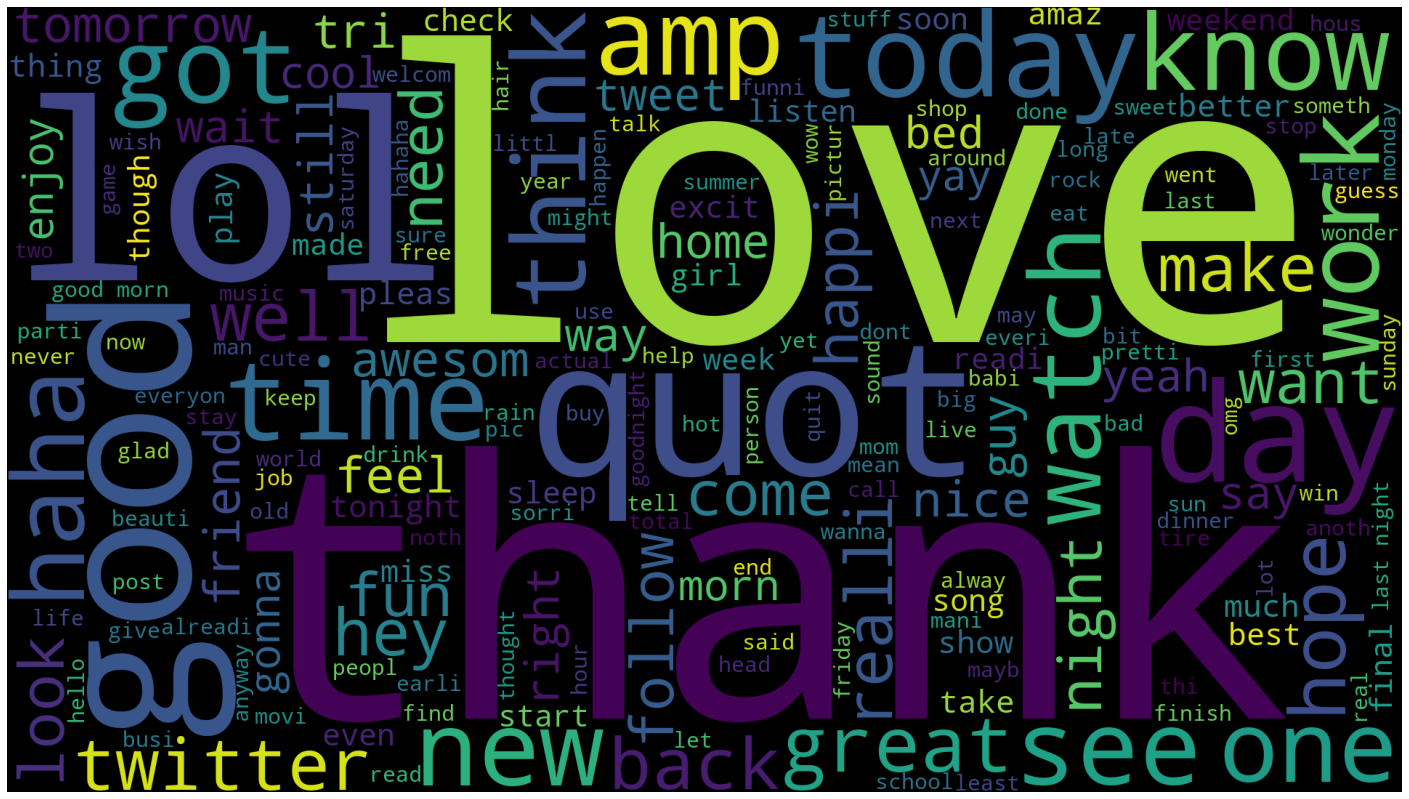

In [46]:
from wordcloud import WordCloud
# Non Depression Words

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color='Black',
                      width=1920,
                      height=1080
                     ).generate(" ".join(df[df['result'] == 0]['message']))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

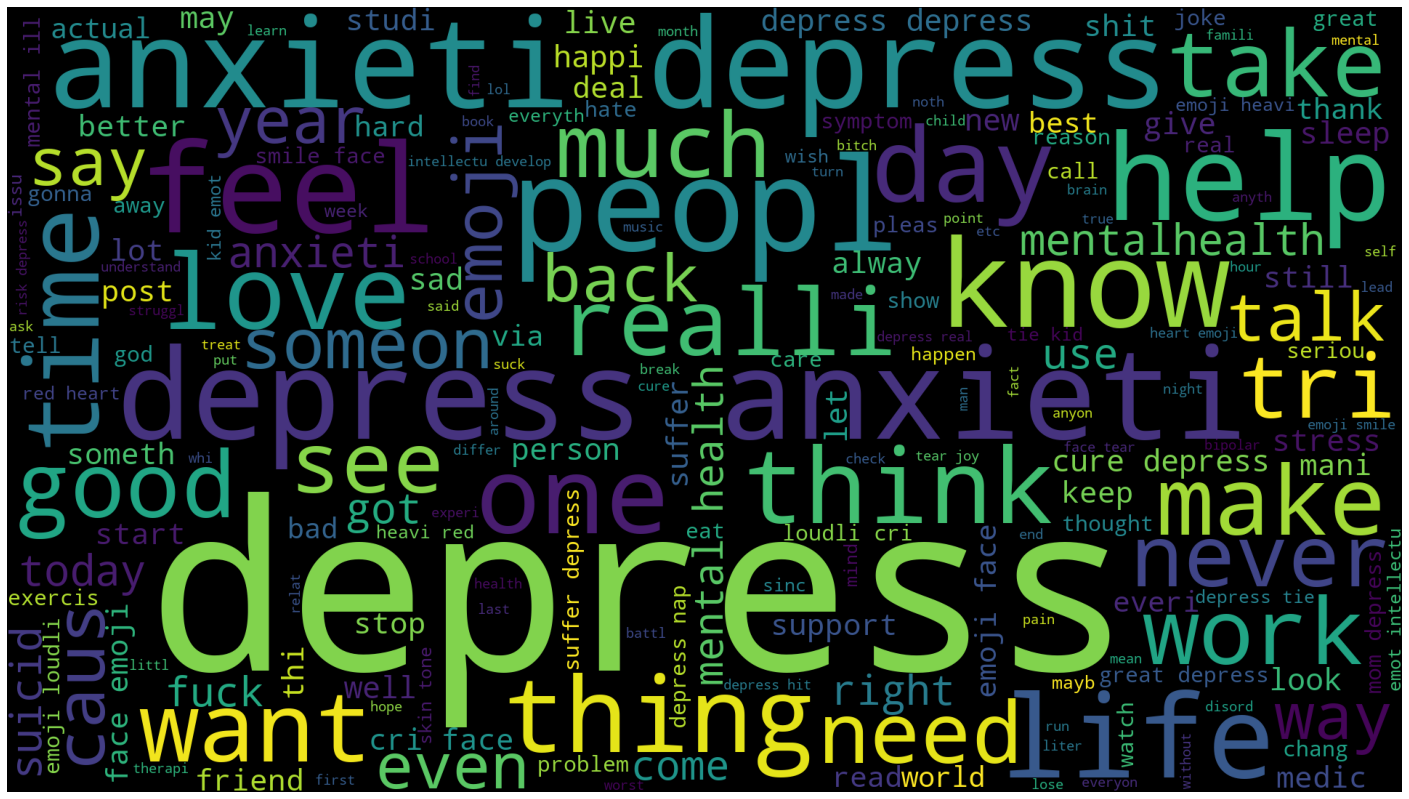

In [47]:
# Depression Words

plt.subplots(figsize=(25,15))
wordcloud = WordCloud(background_color='Black',
                      width=1920,
                      height=1080
                     ).generate(" ".join(df[df['result'] == 1]['message']))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [48]:
#TF-IDF Vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer
Vectorizer = TfidfVectorizer()

# Fit and transform the text data
dataVectorized = Vectorizer.fit_transform(df['message'])

# Get the feature names (words) in the order they appear in the matrix
feature_names = Vectorizer.get_feature_names()

# Convert the TF-IDF matrix to a Pandas DataFrame for easier inspection
df_tfidf = pd.DataFrame(dataVectorized.toarray(), columns=feature_names)

In [49]:
df_tfidf

,aacerr,aacura,aah,aahahaa,aahh,aahhaha,aaron,aaronmcarrol,abandon,abat,...,zombien,zombilici,zomg,zone,zoo,zoot,zooyork,zpush,ztnewetnorb,zumba
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10308,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10309,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
df_tfidf.shape

(10313, 14869)

In [51]:
feature_names[:500]

['aacerr',
 'aacura',
 'aah',
 'aahahaa',
 'aahh',
 'aahhaha',
 'aaron',
 'aaronmcarrol',
 'abandon',
 'abat',
 'abatevintag',
 'abbi',
 'abbrevi',
 'abbynorm',
 'abbyrosia',
 'abc',
 'abdulla',
 'abduzeedo',
 'abe',
 'abeautyhealthi',
 'abecryst',
 'abeerak',
 'abel',
 'abhor',
 'abi',
 'abil',
 'abit',
 'abl',
 'abnorm',
 'aboard',
 'abokssignatur',
 'abort',
 'aboslut',
 'abound',
 'about',
 'abraham',
 'abroad',
 'absenc',
 'absent',
 'absinth',
 'absolout',
 'absolut',
 'absolutli',
 'absorb',
 'abt',
 'abu',
 'abund',
 'abus',
 'academ',
 'academi',
 'acb',
 'acc',
 'accent',
 'accept',
 'acceptancei',
 'access',
 'accessori',
 'accid',
 'accident',
 'accommod',
 'accompani',
 'accomplish',
 'accord',
 'accordingli',
 'account',
 'accout',
 'acct',
 'acctng',
 'accur',
 'accus',
 'acdc',
 'ace',
 'aceconcierg',
 'aceppt',
 'aceybongo',
 'ach',
 'achiev',
 'achiv',
 'achja',
 'acho',
 'acidicic',
 'acim',
 'acmpr',
 'acn',
 'acoust',
 'acquant',
 'across',
 'acryl',
 'act',
 'acti

In [27]:
#df_tfidf.to_csv('tfidf_data.csv', index=False)